In [1]:
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib

In [28]:
from targets.conditional_density_estimation_target import Wave
target = Wave()

N_simulations = 10000
D_theta = target.sample_prior(N_simulations)
D_x = target.simulate(D_theta)

mu_theta = torch.zeros(1)
sigma_theta = torch.eye(1)
theta_prior_distribution = torch.distributions.MultivariateNormal(mu_theta, sigma_theta)
theta0 = theta_prior_distribution.sample()

N_observations = 100
x0 = target.simulate(theta_0.unsqueeze(0).repeat(N_observations,1))

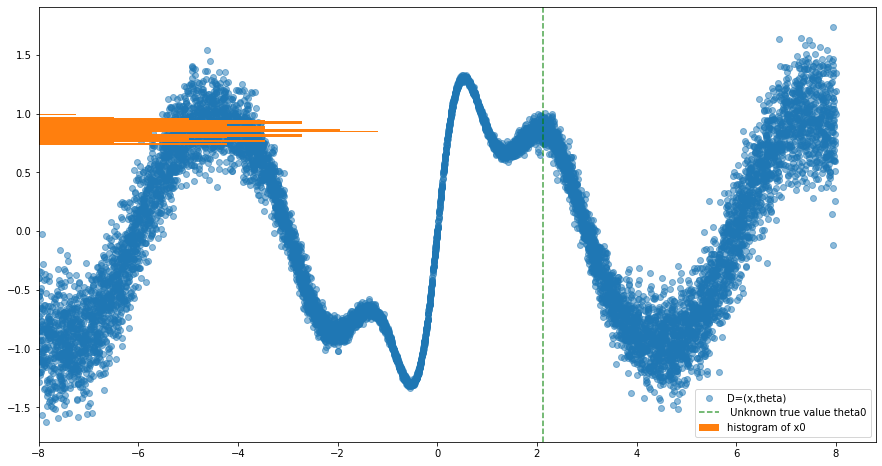

In [30]:
plt.figure(figsize = (15,8))
plt.set_xlim = (-8,8)
plt.scatter(D_theta[:,0].numpy(), D_x.numpy(), alpha =.5, label = 'D=(x,theta)') 
plt.axvline(theta_0.numpy(), color = 'green', alpha = .7, linestyle = '--', label=' Unknown true value theta0')
hist = plt.hist(x0.numpy(), orientation ='horizontal', bins = 20, density = True, bottom = -8, label = 'histogram of x0', color = 'C1')
plt.legend()

In [37]:
alpha = torch.tensor(500.)
truncation = 10
Beta_distribution = torch.distributions.Beta(1, alpha)

In [38]:
def sample_weights(z, z_tilde): 
    Z = torch.cat([z, z_tilde], dim =0)
    counts = torch.unique(Z, return_counts = True)[1]
    probs = torch.cat([counts,alpha.unsqueeze(-1)], dim = -1)
    w = torch.distributions.Dirichlet(probs).sample()
    r = w[-1]
    w_ = w[:-1]
    for i in range(truncation-1):
        v = Beta_distribution.sample()
        w = r*v
        r = r*(1-v)
        w_ = torch.cat([w_,w.unsqueeze(-1)], dim = -1)
    w_ = torch.cat([w_,r.unsqueeze(-1)], dim = -1)
    return w_

In [53]:
number_gibbs_iterations = 1
z = torch.ones(N_simulations)
mean_theta, sigma_theta = sample_prior_parameters_theta(1)
beta, sigma_x = sample_prior_parameters_x(1)
z_tilde = torch.ones(N_observations)
for i in range(number_gibbs_iterations):
    w = sample_weights(z,z_tilde)
    mean_theta, sigma_theta, beta, sigma_x = repopulate_parameters(mean_theta, sigma_theta, beta, sigma_x)

    

torch.Size([11, 1])
torch.Size([11, 1, 1])
torch.Size([11, 2])
torch.Size([11, 1, 1])


In [51]:
d=1
nu = 2
lbda = 0.1
mu = torch.zeros(d)
psi = torch.eye(d)

def sample_prior_parameters_theta(num_samples):
    sigma_theta = torch.inverse(torch.distributions.Wishart(nu,torch.inverse(psi)).sample([num_samples]))
    sigma_theta = (sigma_theta + torch.transpose(sigma_theta, 1,2))/2
    mean_theta = torch.distributions.MultivariateNormal(mu,scale_tril = torch.cholesky(sigma_theta)/(lbda**(1/2))).sample()
    return mean_theta, sigma_theta

mu_beta = torch.zeros(d+1)
sigma_beta = torch.eye(d+1)
eta = 2
phi  = torch.eye(d)

def sample_prior_parameters_x(num_samples):
    sigma_x = torch.inverse(torch.distributions.Wishart(nu,torch.inverse(psi)).sample([num_samples]))
    beta = torch.distributions.MultivariateNormal(mu_beta, sigma_beta).sample([num_samples])
    return beta, sigma_x
    
def repopulate_parameters(mean_theta, sigma_theta, beta, sigma_x):
    _mean_theta, _sigma_theta = sample_prior_parameters_theta(truncation)
    mean_theta = torch.cat([mean_theta, _mean_theta], dim = 0)
    sigma_theta = torch.cat([sigma_theta, _sigma_theta], dim = 0)
    _beta, _sigma_x = sample_prior_parameters_x(truncation)
    beta = torch.cat([beta, _beta], dim = 0)
    sigma_x = torch.cat([sigma_x,_sigma_x], dim=0)
    return mean_theta, sigma_theta, beta, sigma_x